In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
img = imread('images/box.png')
imggray = rgb2gray(img)

In [2]:
imggray

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [3]:
from scipy import signal as sig
import numpy as np
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')
I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [4]:
I_x.shape

(252, 323)

In [5]:
imggray.shape

(252, 323)

In [7]:
I_x

array([[-3.,  0.,  0., ...,  0.,  0.,  3.],
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       ..., 
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       [-3.,  0.,  0., ...,  0.,  0.,  3.]])

In [8]:
Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

In [9]:
Ixx

array([[  9.,   0.,   0., ...,   0.,   0.,   9.],
       [ 16.,   0.,   0., ...,   0.,   0.,  16.],
       [ 16.,   0.,   0., ...,   0.,   0.,  16.],
       ..., 
       [ 16.,   0.,   0., ...,   0.,   0.,  16.],
       [ 16.,   0.,   0., ...,   0.,   0.,  16.],
       [  9.,   0.,   0., ...,   0.,   0.,   9.]])

In [12]:
height,width=imggray.shape[:2]
offset=1

In [14]:
height,width

(252, 323)

In [23]:
response=[]
k=0.04
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        #print(Sxx,Syy,Sxy)
            #Find determinant and trace, use to get corner response
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - k*(trace**2)
        response.append([x,y,r])
#response

In [28]:
img.shape

(252, 323, 4)

In [29]:
for rs in response:
    x, y, r = rs
    if r > 0:
        img[y,x][0],img[y,x][1],img[y,x][2] = 255,0,0


In [33]:
from matplotlib import pyplot as plt
import cv2
import matplotlib.cm as cm
def show_img(img,plt,titre):
    plt.imshow(img)
    plt.title(titre)
    plt.show()

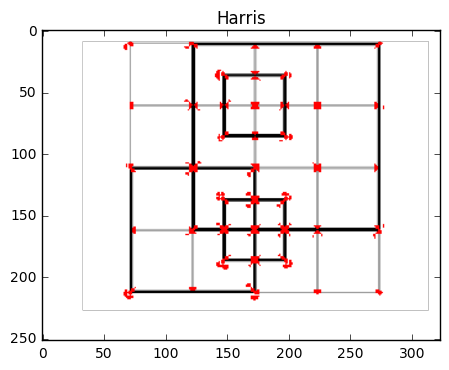

In [34]:
show_img(img,plt,"Harris")